In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as mtp
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [11]:
data = pd.read_csv('Mall_Customers.csv')

In [12]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
x = data.iloc[:, [3, 4]].values

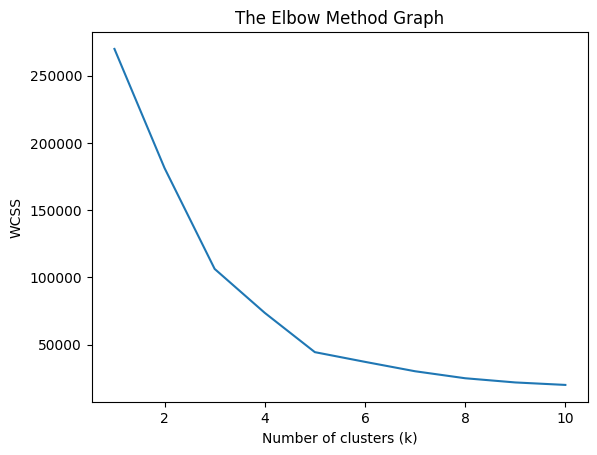

In [14]:
from sklearn.cluster import KMeans

wcss_list = []  

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)  
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)

mtp.plot(range(1, 11), wcss_list)
mtp.title('The Elbow Method Graph')
mtp.xlabel('Number of clusters (k)')
mtp.ylabel('WCSS')
mtp.show()

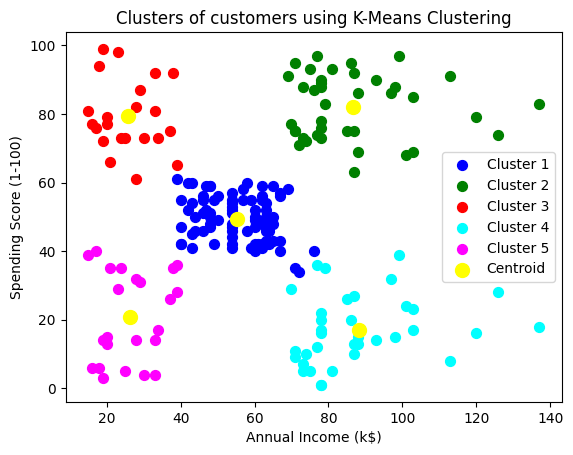

In [15]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)  
y_predict = kmeans.fit_predict(x)

mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s=50, c='blue', label='Cluster 1')  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s=50, c='green', label='Cluster 2')  
mtp.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], s=50, c='red', label='Cluster 3')  
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s=50, c='cyan', label='Cluster 4') 
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s=50, c='magenta', label='Cluster 5')  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroid')
mtp.title('Clusters of customers using K-Means Clustering')
mtp.xlabel('Annual Income (k$)')
mtp.ylabel('Spending Score (1-100)')
mtp.legend()
mtp.show()